In [4]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Question 1) Please read the "sales.csv" file as a DataFrame object named as "sales_df". Print the length and the first 5 tuples of the DataFrame. (5 points)

In [5]:
#codes
sales_df=pd.read_csv("sales.csv")
print("Length of dataframe:",sales_df.shape)
sales_df.head(5)

Length of dataframe: (8523, 46)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


Question2) Split the dataset into the dependent (name it 'x') and independent variables (name it 'y') which are response variable( 'Item_Outlet_Sales') and predictors. Print their shape info and top 10 records of them. (5 points)

In [6]:
#codes
x=sales_df.drop(["Item_Outlet_Sales"],axis=1)
y=sales_df[["Item_Outlet_Sales"]]
print("Shape of x->",x.shape)
x.head(10)

Shape of x-> (8523, 45)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.930,0.000000,53.8614,1987,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
5,10.395,0.000000,51.4008,2009,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
6,13.650,0.012741,57.6588,1987,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
7,0.000,0.127470,107.7622,1985,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
8,16.200,0.016687,96.9726,2002,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
9,19.200,0.094450,187.8214,2007,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [7]:
print("Shape of y->",y.shape)
y.head(10)

Shape of y-> (8523, 1)


,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
5,556.6088
6,343.5528
7,4022.7636
8,1076.5986
9,4710.5350


Question3) Normalization step: Rescale dependent variables (x variable) into the range [0,1] by applying  MinMaxScaler to normalize. Lastly convert into dataframe (10 points)

In [8]:
# Importing MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

In [9]:
#codes
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled_df=pd.DataFrame(x_scaled, index=x.index,columns=x.columns)
x_scaled_df.head(10)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.435597,0.048866,0.927507,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.277283,0.058705,0.072068,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.819672,0.051037,0.468288,0.583333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.899297,0.000000,0.640093,0.541667,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.418267,0.000000,0.095805,0.083333,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,0.486885,0.000000,0.085361,1.000000,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,0.639344,0.038799,0.111923,0.083333,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,0.000000,0.388165,0.324587,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,0.758782,0.050815,0.278791,0.708333,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,0.899297,0.287613,0.664399,0.916667,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


Question 4) Split data into train and test sets. Use the split ratio as 80:20 and set the 'random_state' to an integer value. (10 points)

In [10]:
# Importing Train test split
from sklearn.model_selection import train_test_split

In [11]:
#codes
X_train,X_test,Y_train,Y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=1)


Question 5) Create an instance of kNN with a number of neighbors=3, then fit kNN regression model to train data. Finally, make prediction and calculate mean squared error (MSE). Print MSE value. (15 points)

In [12]:
#importing KNN regressor and metric mse
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

In [13]:
#codes
knn_model=KNN(n_neighbors=3).fit(X_train,Y_train)
y_pred=knn_model.predict(X_test)
mse_val=mse(Y_test,y_pred)
mse_val

1790835.1426143483

Question 6) Create Elbow function which does the same operation in the previous question for each k instance in the range [1-40] by using Manhattan and Euclidean distance metrics separately in order to determine the optimal value of k. (25 points)

In [24]:
#codes
range_k=range(1,41)
def Elbow(X_train,Y_train,X_test,Y_test):
    mseForEuclidean=[]
    global k
    for i in range(1,41):
        knn_model=KNN(n_neighbors=i,metric="euclidean").fit(X_train,Y_train)
        y_pred=knn_model.predict(X_test)
        mseForEuclidean.append(mse(Y_test,y_pred))   
    mseForManhattan=[]
    for i in range(1,41):
        knn_model=KNN(n_neighbors=i,metric="manhattan").fit(X_train,Y_train)
        y_pred=knn_model.predict(X_test)
        mseForManhattan.append(mse(Y_test,y_pred))
    a=min(mseForEuclidean)
    b=min(mseForManhattan)
    if(a<b):
        k= mseForEuclidean.index(a)+1
    else:
        k=mseForManhattan.index(b)+1
    return mseForEuclidean,mseForManhattan


Call the defined function for defined range of k

In [29]:
#codes
mseForEuclidean,mseForManhattan=Elbow(X_train,Y_train,X_test,Y_test)
print("Optimal value k for elbow function is:",k)

Optimal value k for elbow function is: 9


Question 7) Visualize the test mean squared error (MSE) results of Manhattan and Euclidean distance metric by plotting. Two curves should be displayed in the same graph. (15 points)

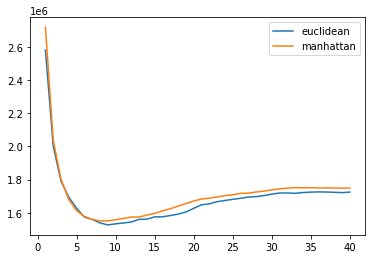

In [28]:
#codes
plt.plot(range_k,mseForEuclidean,label="euclidean")
plt.plot(range_k,mseForManhattan,label="manhattan")
plt.legend()
plt.show()

Question 8) According to obtained result, decide distance metric and optimal k value, and then use them for your kNN model, and make a prediction. Print MSE value for chosen k value. (15 points)

In [27]:
#codes
"""
I choose the euclidean distance metric. Because it has lower error. And while k is 9, the error is minumum. So optimal k is 9.
"""
knn_model=KNN(n_neighbors=k,metric="euclidean").fit(X_train,Y_train)
y_pred=knn_model.predict(X_test)
mse(Y_test,y_pred)


1527023.832383918